## ライブラリ読み込み

In [74]:
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## パラメータ設定

- `data_file` : 分析対象の特徴量データ
- `cluster_num` : クラスタ数

In [75]:
data = '/Users/takeshi/Projects/MachineLearning/Clustering/data/data4.csv'
cluster_num = 5

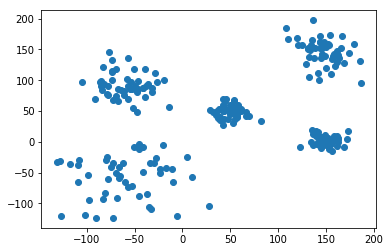

In [76]:
# データ読み込み
df = pd.read_csv(data)
data_array = df.values

if data_array.shape[1] == 2:
    plt.scatter(data_array[:,0],data_array[:,1])

## k-meansでクラスタリング

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

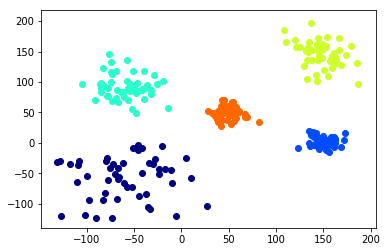

In [77]:
pred = KMeans(n_clusters=cluster_num).fit_predict(data_array)
uniq_cluster = np.unique(pred)
for i,cluster in enumerate(uniq_cluster):
    target = data_array[pred==cluster]
    color = cm.jet(float(i)/cluster_num)
    plt.scatter(target[:,0],target[:,1],c=color)

# 各データのシルエット係数を計算して可視化

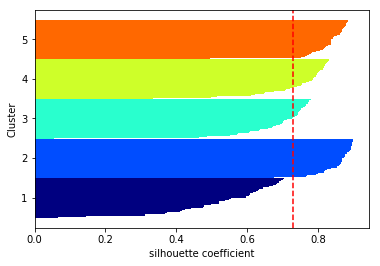

In [78]:
from sklearn.metrics import silhouette_samples

silhouette_val = silhouette_samples(data_array,labels=pred)
y_ax_lower_pos, y_ax_upper_pos= 0,0
yticks = []

for index,item in enumerate(uniq_cluster):
    target_val = silhouette_val[pred==item] # 各クラスタに含まれるデータのシルエット係数のみ残す
    target_val.sort()
    y_ax_upper_pos += len(target_val)
    color = cm.jet(float(index)/cluster_num)
    plt.barh(range(y_ax_lower_pos,y_ax_upper_pos),target_val,height=1.0,color=color)
    yticks.append((y_ax_lower_pos+y_ax_upper_pos)/2)
    y_ax_lower_pos += len(target_val)

ave_silhouette = np.mean(silhouette_val)
plt.axvline(ave_silhouette,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,uniq_cluster + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()